## Import Libraries

In [10]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import spacy
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

## Import Data

In [3]:
data = pd.read_csv("/content/Fake_Real_Data.csv")

In [4]:
data.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


## Label Counts

In [7]:
data['label'].value_counts()

,count
label,
Fake,5000
Real,4900


## Visualize Labels

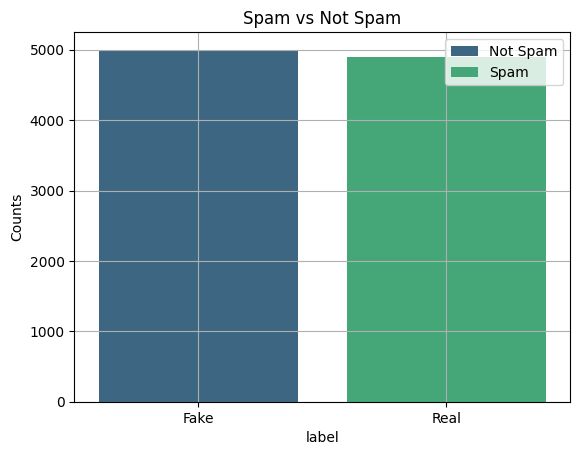

In [9]:
sns.countplot(data=data, x='label', palette='viridis', hue='label')
plt.grid(True)
plt.ylabel("Counts")
plt.title("Spam vs Not Spam")
plt.legend(labels=['Not Spam', 'Spam'])
plt.show()

## Data Preprocessing

In [11]:
data.isnull().sum()

,0
Text,0
label,0


## Remove Duplicated data

In [12]:
data.duplicated().sum()

35

In [13]:
data.shape

(9900, 2)

In [15]:
data = data[~data.duplicated()]

## Encode Label

In [17]:
data['Encoded_Label'] = data['label'].map({
    'Real': 1,
    'Fake': 0
})

<ipython-input-17-7eb699a64916>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Encoded_Label'] = data['label'].map({


## Preprocessor

- You can also use NLTK for preprocessing

In [22]:
nlp = spacy.load("en_core_web_sm")
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [24]:
data['Preprocessed_txt'] = data['Text'].apply(preprocess_text)

<ipython-input-24-da4322e3e963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Preprocessed_txt'] = data['Text'].apply(preprocess_text)


## Dependent vs Independent Split

In [26]:
X = data['Preprocessed_txt']
y = data['Encoded_Label']

In [29]:
X.shape[0] * 0.2

1973.0

## Train Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2025)

## Use CountVectorizer to make corpus

In [38]:
v = CountVectorizer()
X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

In [39]:
v.vocabulary_

{'reveal': 34572,
 'trump': 41265,
 'illegally': 20604,
 'violate': 43212,
 'embargo': 14681,
 'cuba': 11531,
 'put': 32870,
 'money': 27446,
 'killer': 23347,
 'fidel': 16252,
 'castro': 8889,
 'hand': 18957,
 'law': 24226,
 'order': 29868,
 'candidate': 8616,
 'break': 7783,
 'again': 3999,
 'donald': 13599,
 'recently': 33698,
 'declare': 12207,
 'reverse': 34591,
 'president': 32228,
 'obama': 29361,
 'deal': 12096,
 'reopen': 34202,
 'diplomatic': 13062,
 'relation': 34058,
 'nation': 28217,
 '50': 2684,
 'year': 44880,
 'concession': 10500,
 'barack': 6143,
 'grant': 18347,
 'regime': 33945,
 'executive': 15486,
 'mean': 26423,
 'say': 35879,
 'early': 14226,
 'month': 27508,
 'meet': 26513,
 'demand': 12450,
 'include': 20909,
 'free': 17019,
 'political': 31732,
 'prisoner': 32361,
 'expand': 15538,
 'religious': 34096,
 'liberty': 24637,
 'that': 40175,
 'funny': 17257,
 'republican': 34315,
 'nominee': 28924,
 'certainly': 9104,
 'didn': 12946,
 'shit': 36912,
 'thing': 40373

In [40]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 3, 0, ..., 0, 0, 0])

## Use Naive Bayes Algorithm

In [41]:
model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

## Good Classification Report :)

In [42]:
print(classification_report(y_pred=model.predict(X_test_cv), y_true=y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       957
           1       0.99      0.97      0.98      1016

    accuracy                           0.98      1973
   macro avg       0.98      0.98      0.98      1973
weighted avg       0.98      0.98      0.98      1973



## Do all things in 4 lines of code
- CountVectorizer
- Model

In [45]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [46]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

## Classification Report

In [47]:
print(classification_report(y_pred=pipeline.predict(X_test), y_true=y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       957
           1       0.99      0.97      0.98      1016

    accuracy                           0.98      1973
   macro avg       0.98      0.98      0.98      1973
weighted avg       0.98      0.98      0.98      1973

